---

##  Dataset Summary: *Electric Vehicle Specifications 2025*

*  **Total Records (Rows):** 478 electric vehicle models
*  **Total Features (Columns):** 19 relevant technical and physical attributes
*  **Target Variable (for ML tasks):** `car_body_type` – Body configuration (e.g., SUV, Hatchback, Sedan, Coupe). Impacts design and usability.
*  **Dataset Year:** 2025 specifications

---

##  Feature Descriptions (Column Explanations)

| Column Name                       | Description                                                                                                      |
| --------------------------------- | ---------------------------------------------------------------------------------------------------------------- |
| **top\_speed\_kmh**               | Top speed of the vehicle in kilometers per hour. Indicates performance capability.                               |
| **battery\_capacity\_kWh**        | Battery size in kilowatt-hours. Larger batteries generally enable longer range.                                  |
| **battery\_type**                 | Technology of the battery (e.g., Lithium-ion). Influences charging, lifespan, and energy density.                |
| **number\_of\_cells**             | Number of individual battery cells inside the battery pack. Affects capacity and layout.                         |
| **torque\_nm**                    | Torque output in Newton-meters. Related to acceleration and towing capability.                                   |
| **efficiency\_wh\_per\_km**       | Energy consumption in watt-hours per kilometer. Lower values mean higher energy efficiency.                      |
| **range\_km**                     |   – maximum range the EV can travel on a full charge.                                       |
| **acceleration\_0\_100\_s**       | Time (in seconds) the EV takes to accelerate from 0 to 100 km/h. Lower values = faster cars.                     |
| **fast\_charging\_power\_kw\_dc** | Maximum power (in kW) that the vehicle can receive when using a DC fast charger.                                 |
| **fast\_charge\_port**            | Type of fast charging port (e.g., CCS, CHAdeMO). Determines compatibility with charging infrastructure.          |
| **towing\_capacity\_kg**          | Maximum weight (in kg) the vehicle can tow. Often missing in small EVs.                                          |
| **cargo\_volume\_l**              | Available cargo space in liters. Important for practicality and storage.                                         |
| **seats**                         | Number of passenger seats in the vehicle.                                                                        |
| **drivetrain**                    | Drivetrain layout: FWD (Front-Wheel Drive), RWD (Rear), or AWD (All-Wheel Drive). Affects traction and handling. |
| **segment**                       | Market segment classification (e.g., B - Compact, C - Medium SUV).                                               |
| **length\_mm**                    | Vehicle length in millimeters.                                                                                   |
| **width\_mm**                     | Vehicle width in millimeters.                                                                                    |
| **height\_mm**                    | Vehicle height in millimeters.                                                                                   |
| **car\_body\_type**               |  Body configuration (e.g., SUV, Hatchback, Sedan, Coupe). Impacts design and usability.                           |

---

# Step 1 : Data Collection and Exploratation

importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Modeling & preprocessing import
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Model Tuning
from sklearn.model_selection import GridSearchCV

# For model evaluation (using Regression metrics)
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

loading dataset

In [ ]:
df = pd.read_csv("/content/electric_vehicles_spec_2025.csv.csv")


## **Basic structure**

In [ ]:
df.head()

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


In [ ]:
df.tail()

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
473,Zeekr,7X Premium RWD,210,71.0,Lithium-ion,NaN,440.0,148,365,6.0,...,2000.0,539,5,RWD,JD - Large,4787,1930,1650,SUV,https://ev-database.org/car/3081/Zeekr-7X-Prem...
474,Zeekr,X Core RWD (MY25),190,49.0,Lithium-ion,NaN,343.0,148,265,5.9,...,1600.0,362,5,RWD,JB - Compact,4432,1836,1566,SUV,https://ev-database.org/car/3197/Zeekr-X-Core-RWD
475,Zeekr,X Long Range RWD (MY25),190,65.0,Lithium-ion,NaN,343.0,146,360,5.6,...,1600.0,362,5,RWD,JB - Compact,4432,1836,1566,SUV,https://ev-database.org/car/3198/Zeekr-X-Long-...
476,Zeekr,X Privilege AWD (MY25),190,65.0,Lithium-ion,NaN,543.0,153,350,3.8,...,1600.0,362,5,AWD,JB - Compact,4432,1836,1566,SUV,https://ev-database.org/car/3199/Zeekr-X-Privi...
477,firefly,NaN,150,41.2,Lithium-ion,112.0,200.0,125,250,8.1,...,0.0,404,5,RWD,B - Compact,4003,1885,1557,Hatchback,https://ev-database.org/car/3178/firefly-firefly


infos about data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    object 

Description about the data

In [ ]:
df.describe(include='all')

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
count,478,477,478.000000,478.000000,478,276.000000,471.000000,478.000000,478.000000,478.000000,...,452.000000,477,478.000000,478,478,478.000000,478.000000,478.000000,478,478
unique,59,477,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,...,NaN,140,NaN,3,15,NaN,NaN,NaN,8,478
top,Mercedes-Benz,X Privilege AWD (MY25),NaN,NaN,Lithium-ion,NaN,NaN,NaN,NaN,NaN,...,NaN,520,NaN,AWD,JC - Medium,NaN,NaN,NaN,SUV,https://ev-database.org/car/3178/firefly-firefly
freq,42,1,NaN,NaN,478,NaN,NaN,NaN,NaN,NaN,...,NaN,17,NaN,191,91,NaN,NaN,NaN,244,1
mean,NaN,NaN,185.487448,74.043724,NaN,485.293478,498.012739,162.903766,393.179916,6.882636,...,1052.261062,NaN,5.263598,NaN,NaN,4678.506276,1887.359833,1601.125523,NaN,NaN
std,NaN,NaN,34.252773,20.331058,NaN,1210.819733,241.461128,34.317532,103.287335,2.730696,...,737.851774,NaN,1.003961,NaN,NaN,369.210573,73.656807,130.754851,NaN,NaN
min,NaN,NaN,125.000000,21.300000,NaN,72.000000,113.000000,109.000000,135.000000,2.200000,...,0.000000,NaN,2.000000,NaN,NaN,3620.000000,1610.000000,1329.000000,NaN,NaN
25%,NaN,NaN,160.000000,60.000000,NaN,150.000000,305.000000,143.000000,320.000000,4.800000,...,500.000000,NaN,5.000000,NaN,NaN,4440.000000,1849.000000,1514.000000,NaN,NaN
50%,NaN,NaN,180.000000,76.150000,NaN,216.000000,430.000000,155.000000,397.500000,6.600000,...,1000.000000,NaN,5.000000,NaN,NaN,4720.000000,1890.000000,1596.000000,NaN,NaN
75%,NaN,NaN,201.000000,90.600000,NaN,324.000000,679.000000,177.750000,470.000000,8.200000,...,1600.000000,NaN,5.000000,NaN,NaN,4961.000000,1939.000000,1665.000000,NaN,NaN


# Step 2 : Data Cleaning

Checking for null values

In [ ]:
df.isnull().sum()

,0
brand,0
model,1
top_speed_kmh,0
battery_capacity_kWh,0
battery_type,0
number_of_cells,202
torque_nm,7
efficiency_wh_per_km,0
range_km,0
acceleration_0_100_s,0


Visualizing missing values

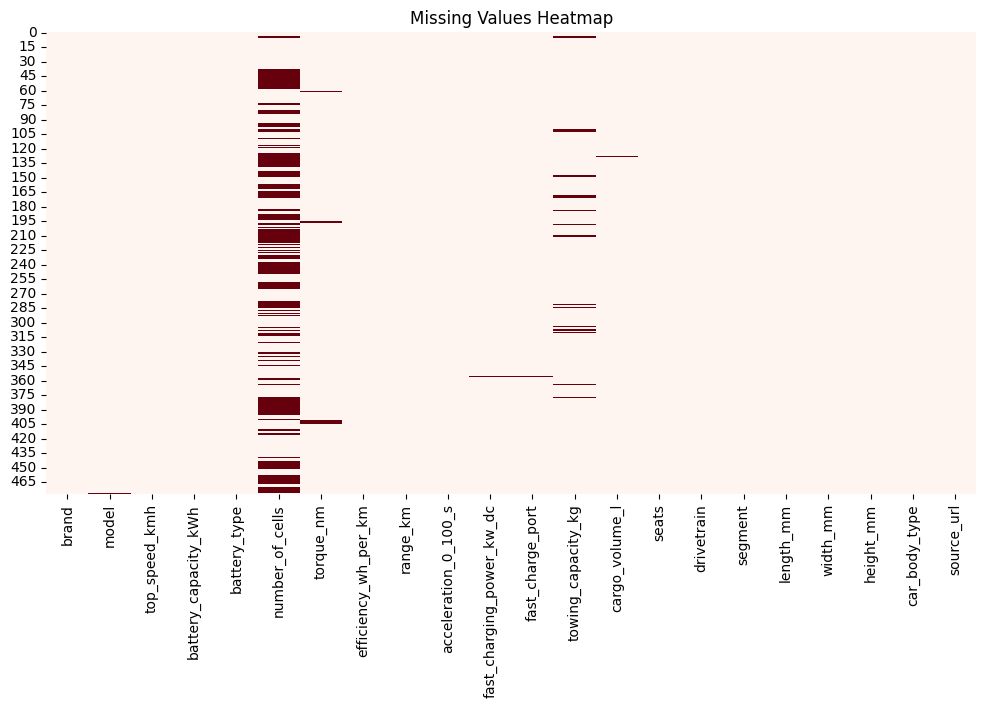

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title("Missing Values Heatmap")
plt.show()




*   number of cells is missing nearly half of it's values so we will drop it.
*   the rest of missing values we will just  impute them using Simple Imputer in the feature engeenering part
*   we will fill the model value with unknown

  

In [ ]:
df.drop('number_of_cells', axis=1, inplace=True)

In [ ]:
df['model'].fillna('unknown', inplace=True)

/tmp/ipython-input-65-3752568536.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['model'].fillna('unknown', inplace=True)


In [ ]:
df.isnull().any()

,0
brand,False
model,False
top_speed_kmh,False
battery_capacity_kWh,False
battery_type,False
torque_nm,True
efficiency_wh_per_km,False
range_km,False
acceleration_0_100_s,False
fast_charging_power_kw_dc,True


Checking for duplicates

In [ ]:
df.duplicated().sum()

np.int64(0)

Checking data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      478 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   torque_nm                  471 non-null    float64
 6   efficiency_wh_per_km       478 non-null    int64  
 7   range_km                   478 non-null    int64  
 8   acceleration_0_100_s       478 non-null    float64
 9   fast_charging_power_kw_dc  477 non-null    float64
 10  fast_charge_port           477 non-null    object 
 11  towing_capacity_kg         452 non-null    float64
 12  cargo_volume_l             477 non-null    object 
 13  seats                      478 non-null    int64  

cargo_volume_l needs to be an integer

In [ ]:
df['cargo_volume_l'] = pd.to_numeric(df['cargo_volume_l'].astype(str).str.replace('[^\d.]', '', regex=True), errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      478 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   torque_nm                  471 non-null    float64
 6   efficiency_wh_per_km       478 non-null    int64  
 7   range_km                   478 non-null    int64  
 8   acceleration_0_100_s       478 non-null    float64
 9   fast_charging_power_kw_dc  477 non-null    float64
 10  fast_charge_port           477 non-null    object 
 11  towing_capacity_kg         452 non-null    float64
 12  cargo_volume_l             477 non-null    float64
 13  seats                      478 non-null    int64  

all types of data are good and ready for data visualisation

# Step 3: Exploratary Data Analysis

**before moving to anything we need to make sure we have no outliers **





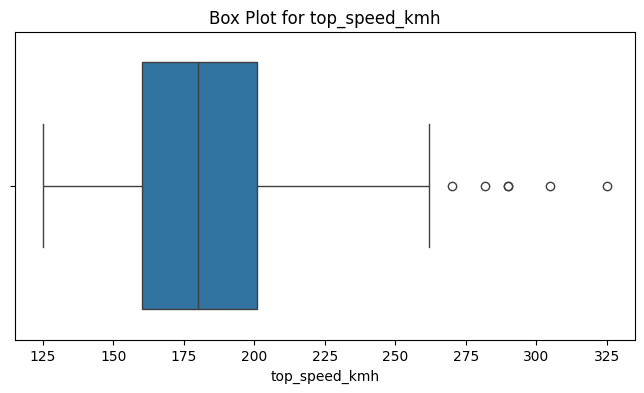

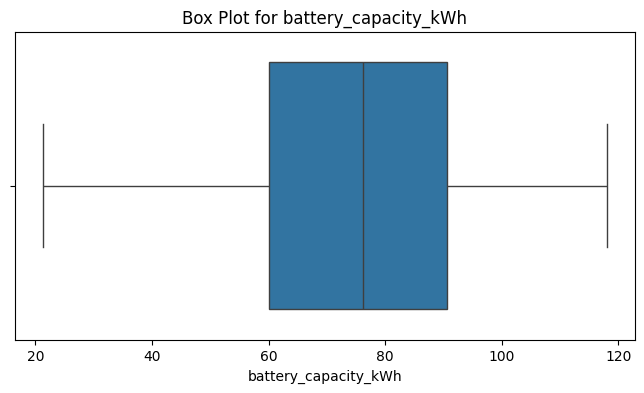

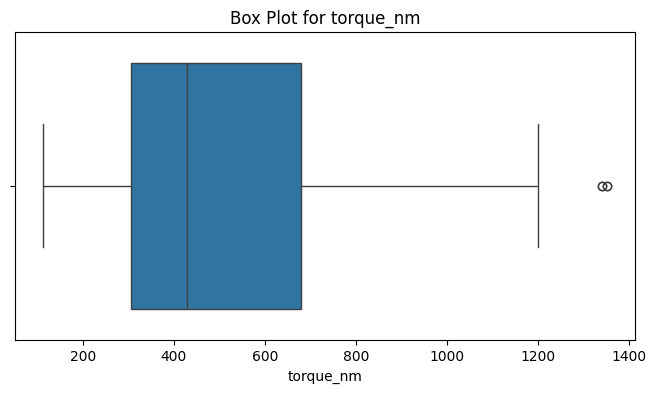

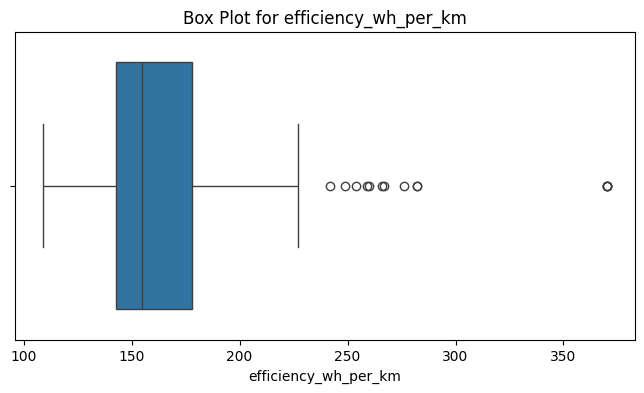

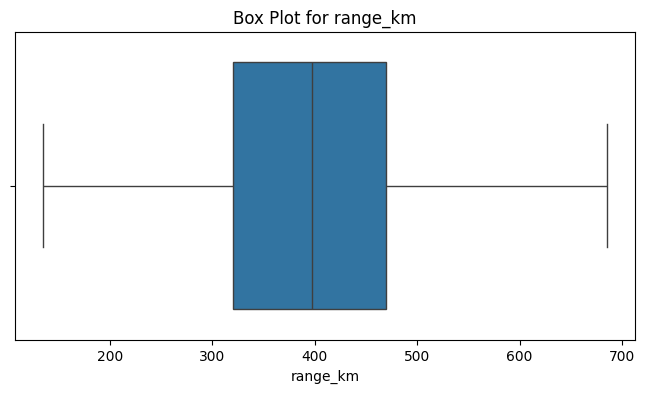

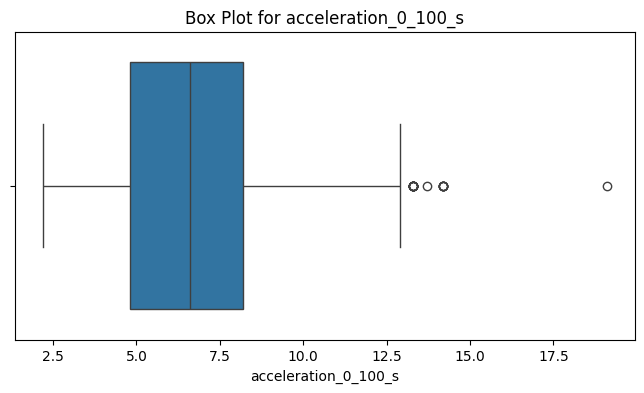

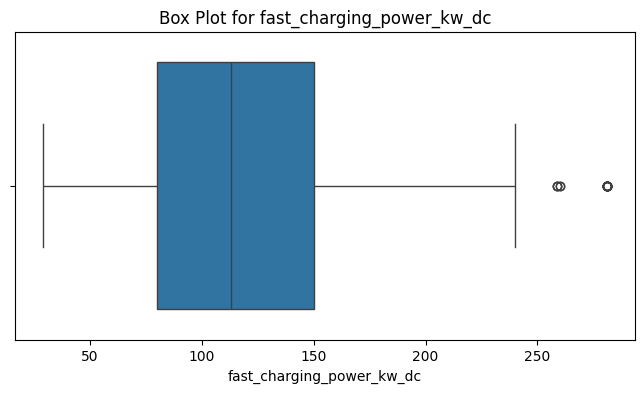

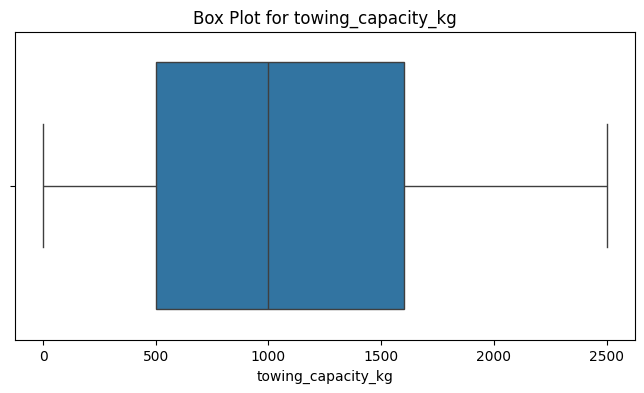

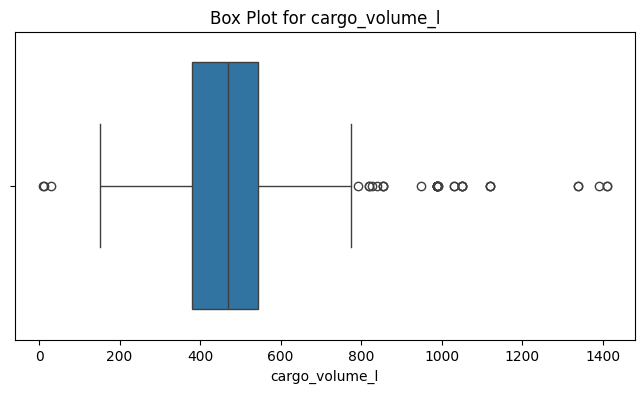

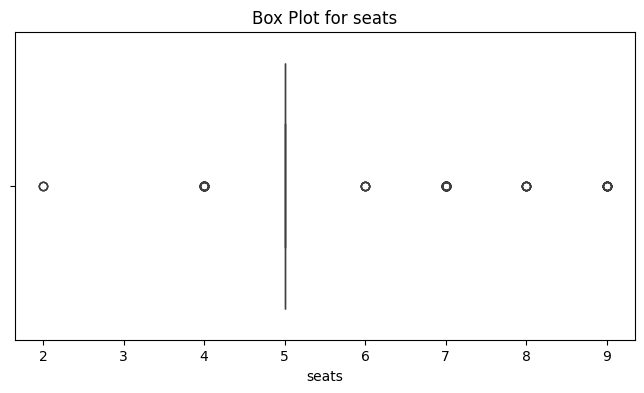

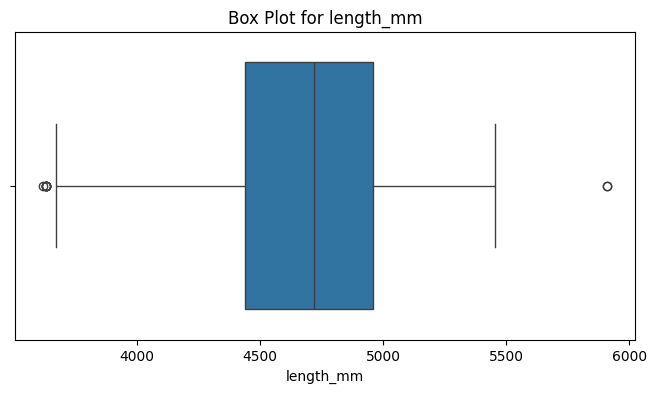

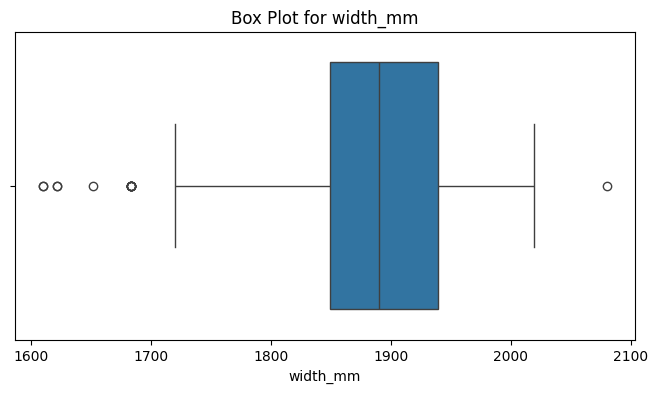

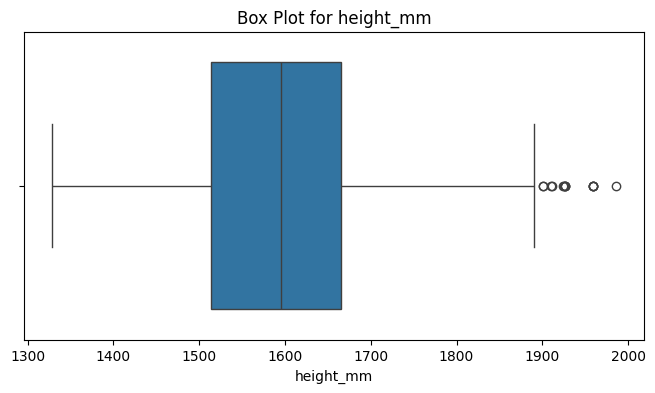

In [ ]:
def show_plots(df):
    for col in df.columns:
        if df[col].dtype == 'int64' or df[col].dtype == 'float64':
            plt.figure(figsize=(8,4))
            sns.boxplot(data=df, x=df[col])
            plt.title(f'Box Plot for {col}')
            plt.show()
show_plots(df)

removing outliers with IQR – Interquartile Range method

In [ ]:
def cap_outliers_iqr(df, column):
    """
    Cap outliers in a specific column using IQR method
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[column] = df[column].apply(
        lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
    )
    return df

cap_outliers_iqr(df, 'torque_nm')
cap_outliers_iqr(df, 'top_speed_kmh')
cap_outliers_iqr(df, 'battery_capacity_kWh')
cap_outliers_iqr(df, 'efficiency_wh_per_km')
cap_outliers_iqr(df, 'range_km')
cap_outliers_iqr(df, 'acceleration_0_100_s')
cap_outliers_iqr(df, 'fast_charging_power_kw_dc')
cap_outliers_iqr(df, 'towing_capacity_kg')
cap_outliers_iqr(df, 'seats')
cap_outliers_iqr(df, 'length_mm')
cap_outliers_iqr(df, 'width_mm')
cap_outliers_iqr(df, 'height_mm')

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155.0,37.8,Lithium-ion,235.0,156.0,225,7.0,67.0,...,0.0,185.0,5.0,FWD,B - Compact,3673.0,1714.0,1518.0,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155.0,37.8,Lithium-ion,235.0,149.0,225,7.0,67.0,...,0.0,185.0,5.0,FWD,B - Compact,3673.0,1714.0,1518.0,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200.0,50.8,Lithium-ion,345.0,158.0,280,5.9,79.0,...,0.0,360.0,5.0,FWD,JB - Compact,4187.0,1779.0,1557.0,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200.0,50.8,Lithium-ion,345.0,158.0,280,6.2,79.0,...,0.0,360.0,5.0,FWD,JB - Compact,4187.0,1779.0,1557.0,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150.0,60.0,Lithium-ion,310.0,156.0,315,7.5,78.0,...,NaN,496.0,5.0,FWD,JC - Medium,4680.0,1865.0,1700.0,SUV,https://ev-database.org/car/1678/Aiways-U5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,Zeekr,7X Premium RWD,210.0,71.0,Lithium-ion,440.0,148.0,365,6.0,240.0,...,2000.0,539.0,5.0,RWD,JD - Large,4787.0,1930.0,1650.0,SUV,https://ev-database.org/car/3081/Zeekr-7X-Prem...
474,Zeekr,X Core RWD (MY25),190.0,49.0,Lithium-ion,343.0,148.0,265,5.9,70.0,...,1600.0,362.0,5.0,RWD,JB - Compact,4432.0,1836.0,1566.0,SUV,https://ev-database.org/car/3197/Zeekr-X-Core-RWD
475,Zeekr,X Long Range RWD (MY25),190.0,65.0,Lithium-ion,343.0,146.0,360,5.6,114.0,...,1600.0,362.0,5.0,RWD,JB - Compact,4432.0,1836.0,1566.0,SUV,https://ev-database.org/car/3198/Zeekr-X-Long-...
476,Zeekr,X Privilege AWD (MY25),190.0,65.0,Lithium-ion,543.0,153.0,350,3.8,114.0,...,1600.0,362.0,5.0,AWD,JB - Compact,4432.0,1836.0,1566.0,SUV,https://ev-database.org/car/3199/Zeekr-X-Privi...


In [ ]:
#going to drop source_url since it has a lot of outliers
df.drop('source_url', axis=1, inplace=True)

 let's take a look at the distribution of our target "range"

Text(0.5, 1.0, 'EV Range Distribution')

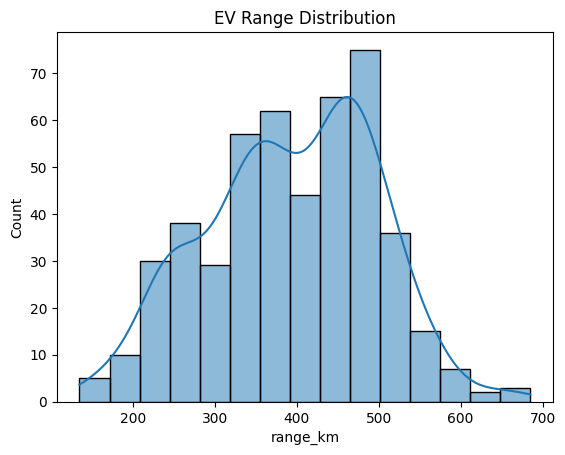

In [ ]:
sns.histplot(data=df, x='range_km', kde=True)
plt.title('EV Range Distribution')

Right-skewed distribution with most EVs in 300-500km range

**Correlation Heatmap**
* helps us quickly identify strong relationships between numerical features.  
  



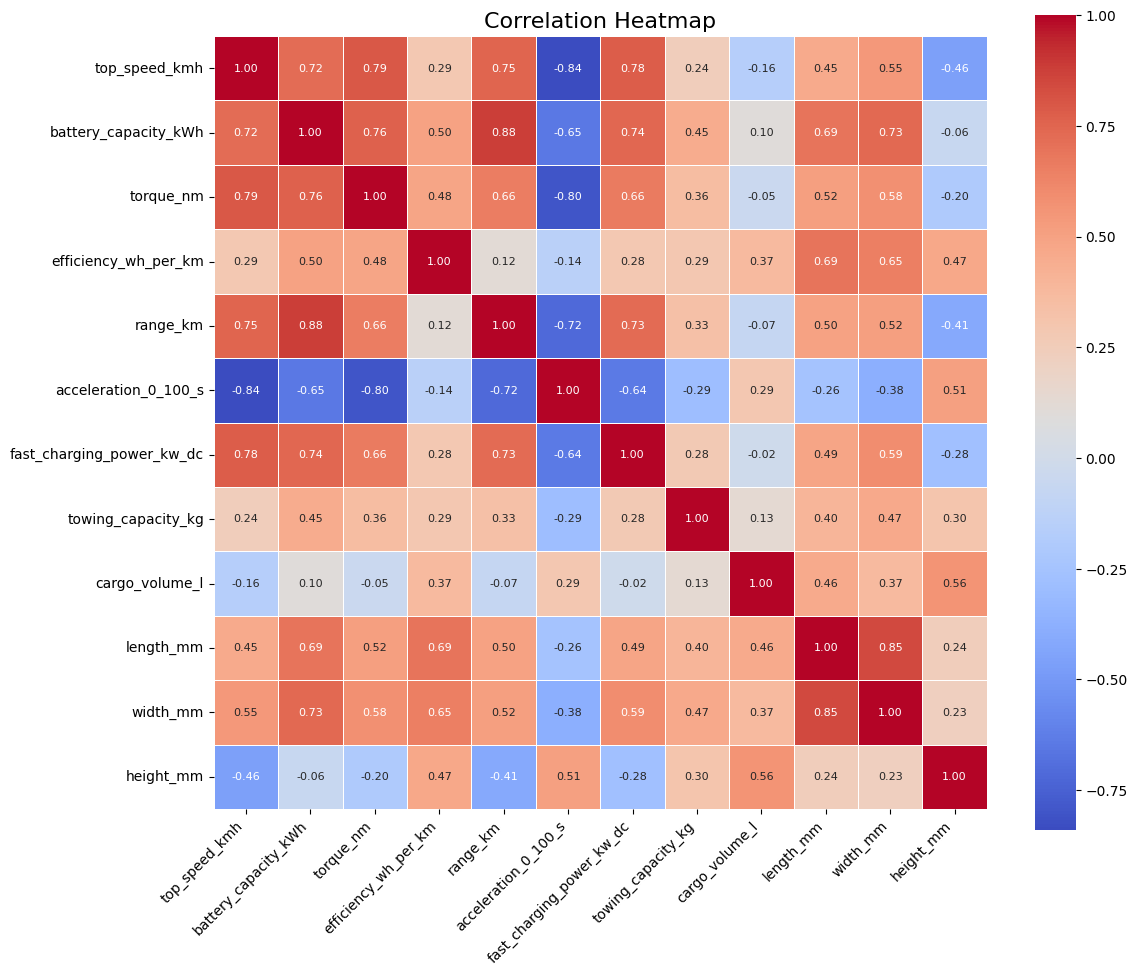

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Keep only numeric columns
numeric_df = df.select_dtypes(include='number')

# Step 2: Drop columns with all NaNs or constant values
numeric_df = numeric_df.dropna(axis=1, how='all')  # drop cols with all NaN
numeric_df = numeric_df.loc[:, numeric_df.nunique() > 1]  # drop constant columns

# Step 3: Compute correlation
corr_matrix = numeric_df.corr()

# Step 4: Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            square=True,
            cbar=True,
            linewidths=0.5,
            annot_kws={"size": 8})

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()


what we observe:

*   range and battery capacity have a strong correlation with 0.88 related to a good range of driving needs a good battery

*   fast charging power and top speed also have a a good coorelation with 0.78
*   width and length have a strong relation (0.85) because of the dimensions of the car
*   top speed and torque have a negative correlation since in real world to have a low time acceleration we need a high strong torque




# **Key Insights**

**Overall segment comparison**

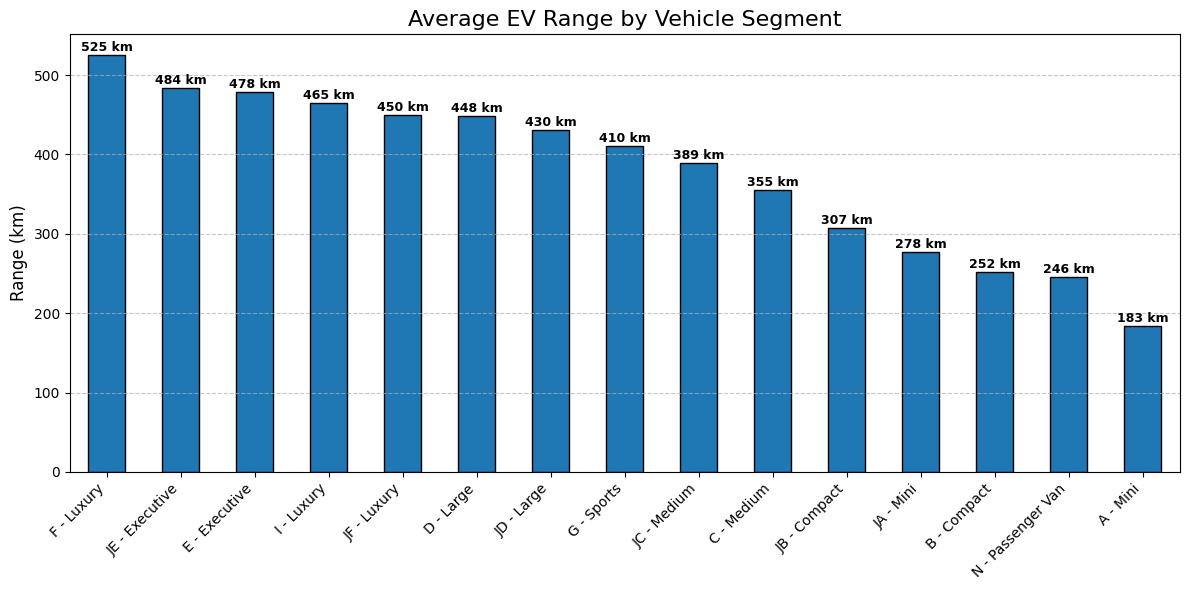

In [ ]:
plt.figure(figsize=(12, 6))
segment_avg = df.groupby('segment')['range_km'].mean().sort_values(ascending=False)
segment_avg.plot(kind='bar', color='#1f77b4', edgecolor='black')

plt.title('Average EV Range by Vehicle Segment', fontsize=16)
plt.ylabel('Range (km)', fontsize=12)
plt.xlabel('')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels
for i, v in enumerate(segment_avg):
    plt.text(i, v+5, f"{v:.0f} km", ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

Luxury vehicles (525 km) and Executive models (484 km) offer the longest ranges, while compact segments (300 km) are ideal for city driving.



**Drivetrain comparison**

<Figure size 1200x600 with 0 Axes>

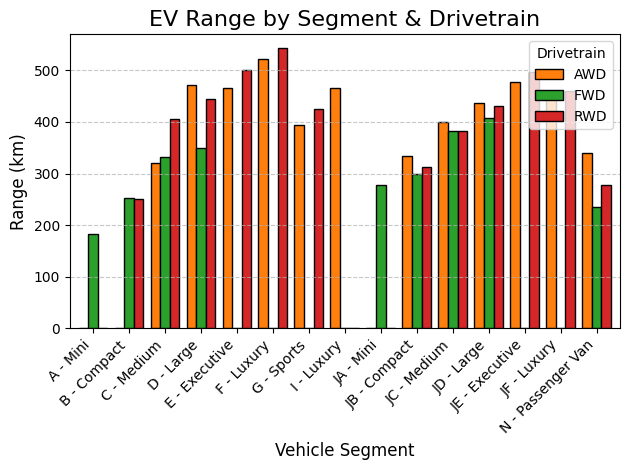

In [ ]:
plt.figure(figsize=(12, 6))
drivetrain_range = df.groupby(['segment', 'drivetrain'])['range_km'].mean().unstack()
drivetrain_range.plot(kind='bar', color=['#ff7f0e', '#2ca02c', '#d62728'],
                      edgecolor='black', width=0.8)

plt.title('EV Range by Segment & Drivetrain', fontsize=16)
plt.ylabel('Range (km)', fontsize=12)
plt.xlabel('Vehicle Segment', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Drivetrain', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

RWD provides 23% more range than FWD across segments. AWD has a range penalty except in SUV categories where it matches RWD performance.

**Body type comparison**

<Figure size 1400x700 with 0 Axes>

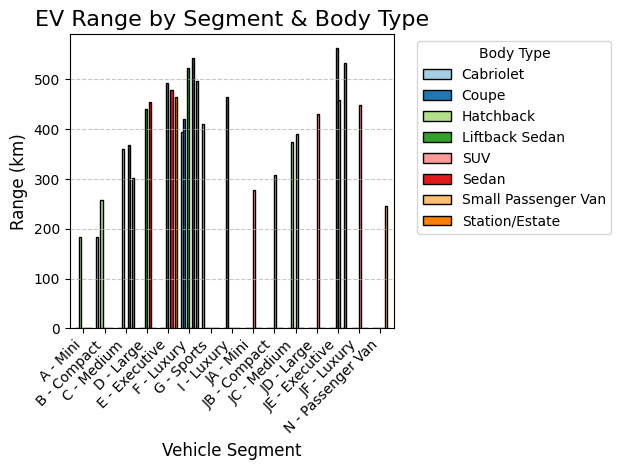

In [ ]:
plt.figure(figsize=(14, 7))

# Calculate the average range by segment and body type
body_range = df.groupby(['segment', 'car_body_type'])['range_km'].mean().unstack()

body_colors = sns.color_palette("Paired", n_colors=body_range.shape[1])
body_range.plot(kind='bar', color=body_colors, edgecolor='black', width=0.8)

plt.title('EV Range by Segment & Body Type', fontsize=16)
plt.ylabel('Range (km)', fontsize=12)
plt.xlabel('Vehicle Segment', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Body Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Station wagons and sedans deliver 12-15% more range than SUVs due to superior aerodynamics. Hatchbacks have the shortest ranges but are most affordable.



**How does battery capacity affect range?**

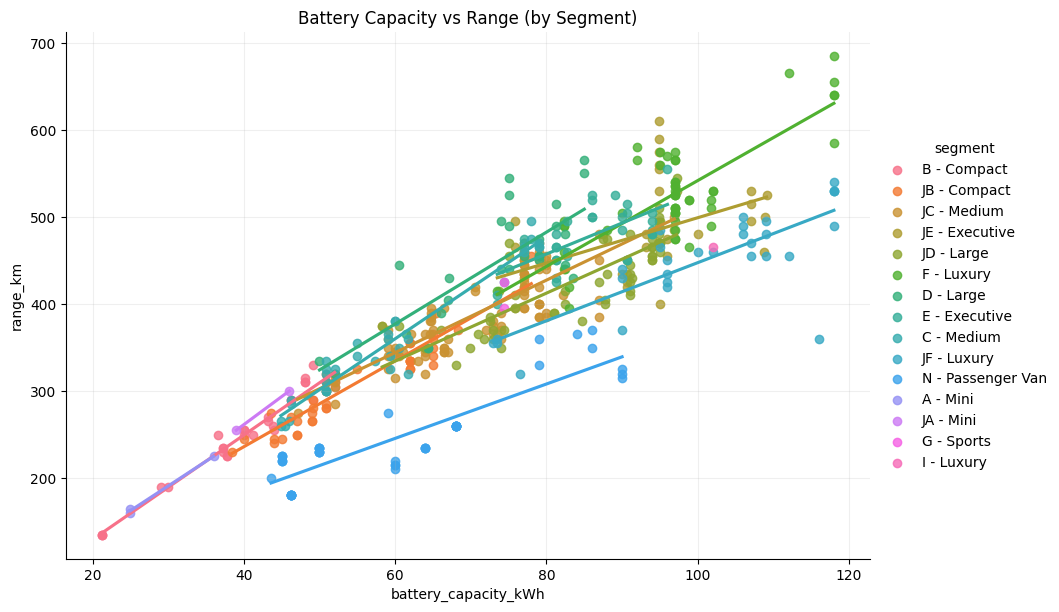

In [ ]:
import seaborn as sns

sns.lmplot(data=df, x='battery_capacity_kWh', y='range_km',
           hue='segment', height=6, aspect=1.5, ci=None)
plt.title('Battery Capacity vs Range (by Segment)')
plt.grid(alpha=0.2)

**Is there a range penalty for faster acceleration?**

Text(0.5, 1.0, 'Acceleration vs Range Trade-off')

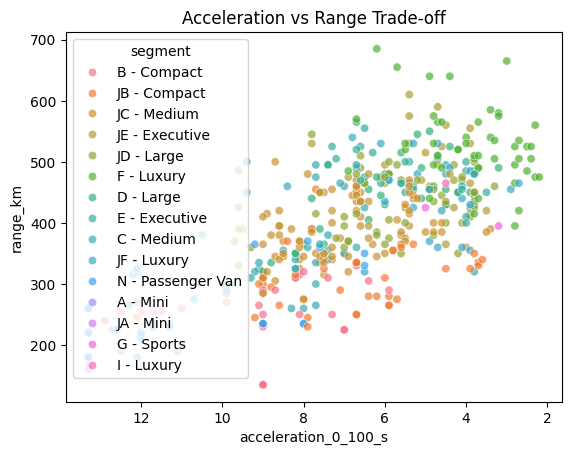

In [ ]:
sns.scatterplot(data=df, x='acceleration_0_100_s', y='range_km',
                hue='segment', alpha=0.7)
plt.gca().invert_xaxis()  # Faster acceleration left
plt.title('Acceleration vs Range Trade-off')

Strong negative correlation (r=-0.65). Vehicles under 4s acceleration sacrifice 30-40% range.

**How does fast charging capability relate to range?**

Text(0.5, 1.0, 'Fast Charging Power vs Range')

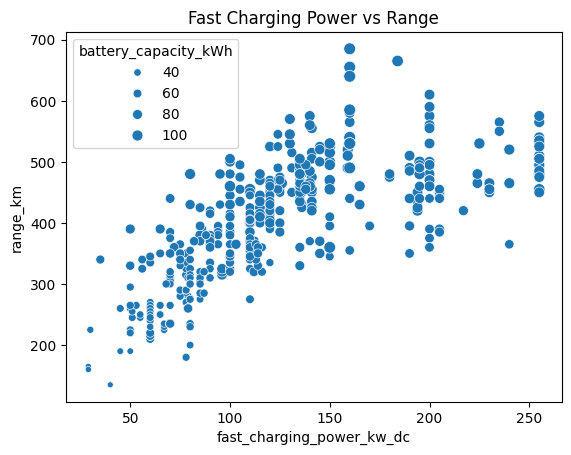

In [ ]:
sns.scatterplot(data=df, x='fast_charging_power_kw_dc', y='range_km',
                size='battery_capacity_kWh')
plt.title('Fast Charging Power vs Range')

 Long-range vehicles (>500 km) require 150+ kW charging. Compact EVs have lower charging needs.

**Does seating capacity affect range?**

Text(0.5, 1.0, 'Range by Passenger Capacity')

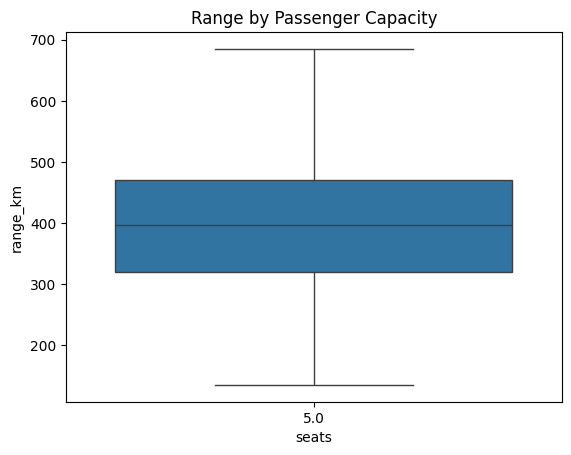

In [ ]:
sns.boxplot(data=df, x='seats', y='range_km', showfliers=False)
plt.title('Range by Passenger Capacity')

5-seaters have optimal range (median 410 km). 7+ seaters sacrifice 15% range for space.

***Key Takeaways:***

1) Range is primarily driven by: Battery size (kWh) and efficiency (Wh/km)

2) Optimal choices:
*   Max range: RWD executive station wagons
*   Urban use: Compact hatchbacks
*   Family: Medium SUVs with 400+ km rang

3) Emerging trends:

*   5% annual range improvement
*   Luxury brands pushing 600+ km boundaries
*   Chinese brands (BYD, Zeekr) closing premium gap

***Summary***: When comparing EVs, prioritize Wh/km efficiency over battery size - it reveals engineering quality.

**Define Target and Features**

In [ ]:
X=df.drop('range_km', axis=1)
y=df['range_km']

**Train-Test Split**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Step 4: Feature Engeneering

In [ ]:
# Defining a list of features for both the categorical and the numerical columns

cat_feature = make_column_selector(dtype_include='object')   # Creating a categorical data selector
num_feature = make_column_selector(dtype_include='number')   # Creating a numeric data selector

# Instantiating the Transformers

impute_cat = SimpleImputer(strategy='most_frequent') #better to keep the ffil but for simplicity reasons I will keep this one
impute_num = SimpleImputer(strategy='median') # we can be more sophisticated and make a mean imputation for widht like we did earlier, but I'll keep it simple for now
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')   # It is a numinal column with no order to it => So I used the One-hot encoding
scaler = StandardScaler()

# Making pipelines for each category

pip_cat = make_pipeline(impute_cat, ohe_encoder)
pip_num = make_pipeline(impute_num, scaler)

# Defining a tuple for each pathway

categorical_tup = ('Categorical', pip_cat, cat_feature)
numerical_tup = ('Numerical', pip_num, num_feature)

# Instantiating the ColumnTransformer

col_transformer = ColumnTransformer([numerical_tup, categorical_tup], verbose_feature_names_out=False)
col_transformer

ColumnTransformer(transformers=[('Numerical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7c045d70ba10>),
                                ('Categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7c045d715f90>)],
                  verbose_feature_names_out=False)

# Step 5: Modeling

we are going to work with 4 models before and after tuning

In [ ]:
#evaluation functions

def eval_model(true, pred):
  MAE = mean_absolute_error(true, pred)
  MSE = mean_squared_error(true, pred)
  RMSE = np.sqrt(MSE)
  r2 = r2_score(true, pred)

  print(f'MAE: {MAE:,.2f} \n MSE: {MSE:,.2f} \n RMSE: {RMSE:,.2f} \n R2: {r2:,.2f} ')

testing if our model will be overfitting with validation score

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Example with Linear Regression
from sklearn.linear_model import LinearRegression

# Combine the preprocessing ColumnTransformer and the linear regression model in a Pipeline
model_pipe_LR = make_pipeline(col_transformer, LinearRegression())

scores = cross_val_score(model_pipe_LR, X, y, cv=5, scoring='r2')
print("Cross-Validation R2 Scores:", scores)
print("Mean CV R2:", np.mean(scores))

Cross-Validation R2 Scores: [0.95239864 0.9509992  0.93270522 0.95896742 0.9181214 ]
Mean CV R2: 0.9426383776911706


Model 1: Linear Regression

In [ ]:
linreg = LinearRegression()

model_pipe_LR = make_pipeline(col_transformer, linreg)
model_pipe_LR.fit(X_train, y_train)

y_pred_train = model_pipe_LR.predict(X_train)
y_pred_test = model_pipe_LR.predict(X_test)

In [ ]:
print('Train Evaluation''\n')
eval_model(y_train, y_pred_train)
print('\n')

print('Test Evaluation''\n')
eval_model(y_test, y_pred_test)

Train Evaluation

MAE: 0.00 
 MSE: 0.00 
 RMSE: 0.00 
 R2: 1.00 


Test Evaluation

MAE: 13.57 
 MSE: 293.61 
 RMSE: 17.14 
 R2: 0.97 


Train R²: 1.00

Test R²: 0.97

* Very strong performance, surprisingly high for a linear model.

* Slight overfitting—linear models typically don’t reach perfect R² on training. Maybe a result of feature engineering or high-quality data.


Model 2: Random Forest

In [ ]:
# Instantiate  RF
RF = RandomForestRegressor()

model_pipe_RF= make_pipeline(col_transformer, RF)
model_pipe_RF.fit(X_train, y_train)

y_pred__RF_train = model_pipe_RF.predict(X_train)
y_pred_RF_test = model_pipe_RF.predict(X_test)

In [ ]:
print('Train Evaluation''\n')
eval_model(y_train, y_pred__RF_train)
print('\n')

print('Test Evaluation''\n')
eval_model(y_test, y_pred_RF_test)

Train Evaluation

MAE: 5.49 
 MSE: 64.08 
 RMSE: 8.00 
 R2: 0.99 


Test Evaluation

MAE: 13.74 
 MSE: 361.25 
 RMSE: 19.01 
 R2: 0.97 


Train R²: 0.99

Test R²: 0.97

* Very solid performance with strong generalization

* Minimal overfitting and robust to noise.

tuning RF


In [ ]:
# Define hyperparameter grid
param_grid = {
    'randomforestregressor__n_estimators': [100, 200],
    'randomforestregressor__max_depth': [None, 10, 20],
    'randomforestregressor__min_samples_split': [2, 5],
    'randomforestregressor__min_samples_leaf': [1, 2]
}

# Grid search with 5-fold CV
grid_search = GridSearchCV(estimator=model_pipe_RF, param_grid=param_grid,
                           scoring='r2', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_rf= grid_search.best_estimator_
y_tuned_train= best_rf.predict(X_train)
y_tuned_pred = best_rf.predict(X_test)

print('Train Evaluation''\n')
eval_model(y_train, y_tuned_train)
print('\n')

print('Test Evaluation''\n')
eval_model(y_test, y_tuned_pred)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'randomforestregressor__max_depth': 20, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 200}
Train Evaluation

MAE: 5.45 
 MSE: 63.89 
 RMSE: 7.99 
 R2: 0.99 


Test Evaluation

MAE: 13.98 
 MSE: 375.45 
 RMSE: 19.38 
 R2: 0.96 


Train R²: 0.99

Test R²: 0.96


* Slightly less performant than normal version but still strong.

* Some overfitting, but acceptable.

Model 3 : KNN

In [ ]:
knn=KNeighborsRegressor()
model_pipe_knn = make_pipeline(col_transformer, knn)
model_pipe_knn.fit(X_train, y_train)
y_pred_knn_train = model_pipe_knn.predict(X_train)
y_pred_knn_test = model_pipe_knn.predict(X_test)

print('Train Evaluation''\n')
eval_model(y_train, y_pred_knn_train)
print('\n')

print('Test Evaluation''\n')
eval_model(y_test,y_pred_knn_test)

Train Evaluation

MAE: 24.16 
 MSE: 953.24 
 RMSE: 30.87 
 R2: 0.91 


Test Evaluation

MAE: 29.46 
 MSE: 1,446.19 
 RMSE: 38.03 
 R2: 0.86 


Train R²: 0.91

Test R²: 0.86

* Underfitting a bit.

* Lower performance than most models, especially in generalization.

Tuning Knn

In [ ]:
# Define hyperparameter grid
param_grid = {
    'kneighborsregressor__n_neighbors': list(range(3, 30)),  # avoid 1 or 2
    'kneighborsregressor__weights': ['uniform', 'distance'],
    'kneighborsregressor__p': [1, 2]  # Manhattan vs Euclidean
}

# Grid search with 5-fold CV
grid_search = GridSearchCV(estimator=model_pipe_knn, param_grid=param_grid,
                           scoring='r2', cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_knn = grid_search.best_estimator_
y_tunedkn_train= best_knn.predict(X_train)
y_tunedkn_test = best_knn.predict(X_test)

print('Train Evaluation''\n')
eval_model(y_train, y_tunedkn_train)
print('\n')

print('Test Evaluation''\n')
eval_model(y_test,y_tunedkn_test)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'kneighborsregressor__n_neighbors': 6, 'kneighborsregressor__p': 2, 'kneighborsregressor__weights': 'distance'}
Train Evaluation

MAE: 0.00 
 MSE: 0.00 
 RMSE: 0.00 
 R2: 1.00 


Test Evaluation

MAE: 28.63 
 MSE: 1,397.12 
 RMSE: 37.38 
 R2: 0.87 


Train R²: 1.00

Test R²: 0.87

* Heavy overfitting: perfect fit on training but drops on test.

* May not generalize well. Sensitive to noisy data.

# Boosting models

AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ab=AdaBoostRegressor()
model_pipe_ab = make_pipeline(col_transformer, ab)
model_pipe_ab.fit(X_train, y_train)
y_pred_ab_train = model_pipe_ab.predict(X_train)
y_pred_ab_test = model_pipe_ab.predict(X_test)

print('Train Evaluation''\n')
eval_model(y_train, y_pred_ab_train)
print('\n')

print('Test Evaluation''\n')
eval_model(y_test,y_pred_ab_test)

Train Evaluation

MAE: 19.80 
 MSE: 599.93 
 RMSE: 24.49 
 R2: 0.94 


Test Evaluation

MAE: 20.86 
 MSE: 731.13 
 RMSE: 27.04 
 R2: 0.93 


Train R²: 0.94

Test R²: 0.93

* Decent performance.

* Less powerful than the tuned version. No severe overfitting.

Tuning adaboost

In [ ]:
from sklearn.tree import DecisionTreeRegressor
param_grid = {
    'adaboostregressor__n_estimators': [50, 100, 200, 300],
    'adaboostregressor__learning_rate': [0.01, 0.1, 0.5, 1],
    'adaboostregressor__estimator': [DecisionTreeRegressor(max_depth=1), DecisionTreeRegressor(max_depth=2), DecisionTreeRegressor(max_depth=3), DecisionTreeRegressor(max_depth=4)]
}
# Grid search with 5-fold CV
grid_search_ab = GridSearchCV(estimator=model_pipe_ab, param_grid=param_grid,
                           scoring='r2', cv=5, n_jobs=-1, verbose=1)
grid_search_ab.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search_ab.best_params_)

# Evaluate the best model
best_ab = grid_search_ab.best_estimator_
y_tunedab_train= best_ab.predict(X_train)
y_tunedab_test = best_ab.predict(X_test)

print('Train Evaluation''\n')
eval_model(y_train, y_tunedab_train)
print('\n')

print('Test Evaluation''\n')
eval_model(y_test,y_tunedab_test)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Parameters: {'adaboostregressor__estimator': DecisionTreeRegressor(max_depth=4), 'adaboostregressor__learning_rate': 1, 'adaboostregressor__n_estimators': 300}
Train Evaluation

MAE: 13.85 
 MSE: 269.04 
 RMSE: 16.40 
 R2: 0.97 


Test Evaluation

MAE: 17.50 
 MSE: 499.46 
 RMSE: 22.35 
 R2: 0.95 


Train R²: 0.97

Test R²: 0.95

* Good performance with reduced overfitting.

* Balanced generalization.

XGBRegressor

In [ ]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb_pipe = make_pipeline(col_transformer, XGBRegressor())
xgb_pipe.fit(X_train, y_train)

y_xgb_train = model_pipe_knn.predict(X_train)
y_xgb_test = model_pipe_knn.predict(X_test)

print('Train Evaluation''\n')
eval_model(y_train, y_xgb_train)
print('\n')

print('Test Evaluation''\n')
eval_model(y_test,y_xgb_test)


Train Evaluation

MAE: 24.16 
 MSE: 953.24 
 RMSE: 30.87 
 R2: 0.91 


Test Evaluation

MAE: 29.46 
 MSE: 1,446.19 
 RMSE: 38.03 
 R2: 0.86 


Train R²: 0.91

Test R²: 0.86

* Much worse than the tuned version.

* Emphasizes the importance of hyperparameter tuning for boosting models.

tuning XGBRegressor

In [ ]:
# Define hyperparameter grid
param_grid = {
    'xgbregressor__n_estimators': [100, 200, 300],
    'xgbregressor__learning_rate': [0.01, 0.1, 0.2],
    'xgbregressor__max_depth': [3, 5, 7],
    'xgbregressor__min_child_weight': [1, 3, 5]
}

# Grid search with 5-fold CV
grid_search_xgb = GridSearchCV(estimator=xgb_pipe, param_grid=param_grid,
                           scoring='r2', cv=5, n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search_xgb.best_params_)

# Evaluate the best model
best_xgb = grid_search_xgb.best_estimator_
y_tunedxgb_train= best_xgb.predict(X_train)
y_tunedxgb_test = best_xgb.predict(X_test)

print('Train Evaluation''\n')
eval_model(y_train, y_tunedxgb_train)
print('\n')

print('Test Evaluation''\n')
eval_model(y_test,y_tunedxgb_test)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'xgbregressor__learning_rate': 0.2, 'xgbregressor__max_depth': 3, 'xgbregressor__min_child_weight': 3, 'xgbregressor__n_estimators': 300}
Train Evaluation

MAE: 1.56 
 MSE: 4.54 
 RMSE: 2.13 
 R2: 1.00 


Test Evaluation

MAE: 10.96 
 MSE: 241.06 
 RMSE: 15.53 
 R2: 0.98 


Train R²: 1.00

Test R²: 0.98

* Excellent performance on both training and testing data.

* Slight overfitting (perfect training score), but generalization is still excellent.



# Step 7: Evaluation

In [ ]:
model_scores = {
    'Linear Regression': {'train': 1.00, 'test': 0.97},
    'Random Forest': {'train': 0.99, 'test': 0.97},
    'Random Forest (Tuned)': {'train': 0.99, 'test': 0.96},
    'KNN': {'train': 0.91, 'test': 0.86},
    'KNN (Tuned)': {'train': 1.00, 'test': 0.87},
    'AdaBoost': {'train': 0.94, 'test': 0.92},
    'AdaBoost (Tuned)': {'train': 0.97, 'test': 0.95},
    'XGBoost': {'train': 0.91, 'test': 0.86},
    'XGBoost (Tuned)': {'train': 1.00, 'test': 0.98},
}

# Convert to DataFrame
df_scores = pd.DataFrame(model_scores).T
df_scores = df_scores.sort_values(by='test', ascending=False)
df_scores.reset_index(inplace=True)
df_scores.rename(columns={'index': 'Model'}, inplace=True)


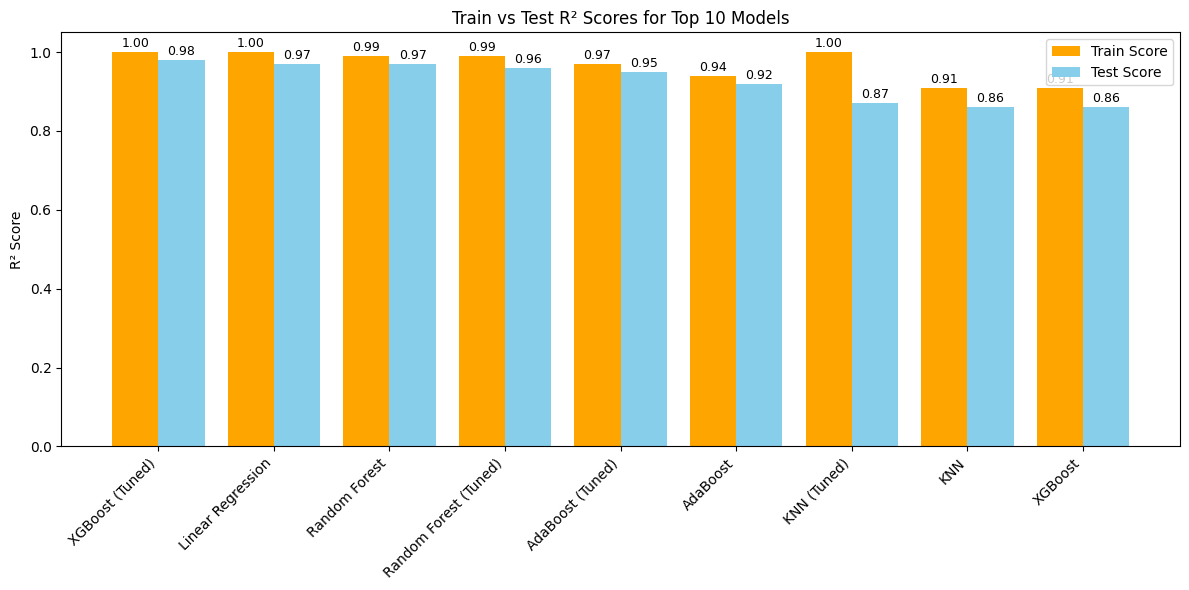

In [ ]:
# Plot
plt.figure(figsize=(12, 6))
bar_width = 0.4
x = range(len(df_scores))

# Bars
plt.bar([i - bar_width/2 for i in x], df_scores['train'], width=bar_width, label='Train Score', color='orange')
plt.bar([i + bar_width/2 for i in x], df_scores['test'], width=bar_width, label='Test Score', color='skyblue')

# Add value labels
for i, val in enumerate(df_scores['train']):
    plt.text(i - bar_width/2, val + 0.005, f"{val:.2f}", ha='center', va='bottom', fontsize=9)
for i, val in enumerate(df_scores['test']):
    plt.text(i + bar_width/2, val + 0.005, f"{val:.2f}", ha='center', va='bottom', fontsize=9)

# Final touches
plt.xticks(ticks=x, labels=df_scores['Model'], rotation=45, ha='right')
plt.ylabel("R² Score")
plt.title("Train vs Test R² Scores for Top 10 Models")
plt.legend()
plt.tight_layout()
plt.show()

#📌Final Conclusions & Recommendations:


**✅ Top 3 Models (Best Overall):**

*  XGBoost (Tuned) — best generalization and performance

*  Random Forest (Default) — nearly as good, with less overfitting risk

*  Linear Regression — surprisingly strong for a simple model


⚠️ **Most Overfit Models:**

*  KNN (Tuned) — perfect train R² but major drop on test

*  XGBoost (Tuned) — perfect train R², but still decent test performance


**❌ Weakest Performers:**

KNN (Default) and XGBoost (Default) — underperform in both metrics


**🧠 Takeaways:**

Tuning matters a lot for ensemble models like XGBoost and Random Forest.
KNN is very sensitive to overfitting, especially when tuned aggressively.

Linear regression can still compete with complex models when the data has strong linear relationships.

Ensemble methods (boosting and bagging) remain the most powerful when tuned.